<a href="https://colab.research.google.com/github/Simarjit1303/Data-Science/blob/main/exercises/machine-learning/Big-Data-Analytics/Big_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk.corpus

corpus_names = [name for name in dir(nltk.corpus) if not name.startswith('_') and hasattr(getattr(nltk.corpus, name), 'fileids')]

# Print each identified corpus name on a new line
for i, name in enumerate(corpus_names):
    print(f"{i+1}. {name}")

1. AlignedCorpusReader
2. AlpinoCorpusReader
3. BCP47CorpusReader
4. BNCCorpusReader
5. BracketParseCorpusReader
6. CHILDESCorpusReader
7. CMUDictCorpusReader
8. CategorizedBracketParseCorpusReader
9. CategorizedCorpusReader
10. CategorizedPlaintextCorpusReader
11. CategorizedSentencesCorpusReader
12. CategorizedTaggedCorpusReader
13. ChasenCorpusReader
14. ChunkedCorpusReader
15. ComparativeSentencesCorpusReader
16. ConllChunkCorpusReader
17. ConllCorpusReader
18. CorpusReader
19. CrubadanCorpusReader
20. DependencyCorpusReader
21. EuroparlCorpusReader
22. FramenetCorpusReader
23. IEERCorpusReader
24. IPIPANCorpusReader
25. IndianCorpusReader
26. KNBCorpusReader
27. LinThesaurusCorpusReader
28. MTECorpusReader
29. MWAPPDBCorpusReader
30. MacMorphoCorpusReader
31. NKJPCorpusReader
32. NPSChatCorpusReader
33. NombankCorpusReader
34. NonbreakingPrefixesCorpusReader
35. OpinionLexiconCorpusReader
36. PPAttachmentCorpusReader
37. PanLexLiteCorpusReader
38. PanlexSwadeshCorpusReader
39. Pl1

In [ ]:
import nltk
from nltk.corpus import wordnet

In [ ]:

nltk.download('wordnet')

def get_unique_synonyms(word):
    """Get all unique synonyms (lemmas) for a given word using WordNet."""
    synonyms = set()  #


    for synset in wordnet.synsets(word):
        for lemma in synset.lemmas():
            synonym = lemma.name().replace('_', ' ')
            synonyms.add(synonym.lower())

    return sorted(synonyms)


word = "car"
synonyms = get_unique_synonyms(word)


print(f"Unique synonyms for '{word}':")
for i, synonym in enumerate(synonyms, 1):
    print(f"{i}. {synonym}")

print(f"\nTotal unique synonyms found: {len(synonyms)}")

Unique synonyms for 'car':
1. auto
2. automobile
3. cable car
4. car
5. elevator car
6. gondola
7. machine
8. motorcar
9. railcar
10. railroad car
11. railway car

Total unique synonyms found: 11


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import random
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

def get_unique_synonyms(word):
    """Get all unique synonyms (lemmas) for a given word using WordNet."""
    synonyms = set()
    for synset in wordnet.synsets(word):
        for lemma in synset.lemmas():
            synonym = lemma.name().replace('_', ' ')
            synonyms.add(synonym.lower())
    return sorted(synonyms)

def replace_with_synonyms_random(sentence):
    words = word_tokenize(sentence)
    tagged = pos_tag(words)

    replaceable_words = []
    for i, (word, tag) in enumerate(tagged):
        if word.isalpha():
            synonyms = get_unique_synonyms(word)
            filtered_synonyms = [s for s in synonyms if s != word.lower()]
            if filtered_synonyms:
                replaceable_words.append((i, filtered_synonyms))

    if replaceable_words:
        n = random.randint(1, len(replaceable_words))
        random.shuffle(replaceable_words)

        for i, synonyms in replaceable_words[:n]:
            words[i] = random.choice(synonyms)

    return ' '.join(words)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [ ]:
sentence = input("Enter Sentence: - ")
new_sentence = replace_with_synonyms_random(sentence)
print("Original:", sentence)
print("Modified:", new_sentence)

Enter Sentence: - The smart student solved a difficult problem quickly.
Original: The smart student solved a difficult problem quickly.
Modified: The smart educatee solved a hard job rapidly .


In [ ]:
import spacy

name_entity_recog = spacy.load('en_core_web_sm')


def extract_entities(word):
  doc = name_entity_recog(word)
  print("Entities found: ")
  for ent in doc.ents:
    print(f"{ent.text} --> {ent.label_}")

In [ ]:
sentence = "Narendra Modi was born in Gujarat and is serving as prime minister of the India."
extract_entities(sentence)

Entities found: 
Narendra Modi --> PERSON
Gujarat --> GPE
India --> GPE


In [ ]:
import spacy
import random

name_entity_recog = spacy.load('en_core_web_sm')

# Sample replacements for some entity types
entity_replacements = {
    "PERSON": ["Elon Musk", "Taylor Swift", "Barack Obama", "Emma Watson"],
    "GPE": ["India", "Germany", "Brazil", "Japan", "Canada"],
    "LOC": ["Sahara Desert", "Amazon Rainforest", "Mount Everest"]
}

def extract_and_replace_entities(text):
    doc = name_entity_recog(text)
    print("Entities found:")
    for ent in doc.ents:
        print(f"{ent.text} --> {ent.label_}")

    new_text = text
    replaced_entities = {}

    for ent in doc.ents:
        ent_type = ent.label_
        ent_text = ent.text

        if ent_type in entity_replacements:
            if ent_text not in replaced_entities:
                options = [e for e in entity_replacements[ent_type] if e.lower() != ent_text.lower()]
                if options:
                    replaced_entities[ent_text] = random.choice(options)
            if ent_text in replaced_entities:
                new_text = new_text.replace(ent_text, replaced_entities[ent_text])

    print("\nModified Text:")
    print(new_text)


In [ ]:
sentence = "Narendra Modi was born in Gujarat and is serving as prime minister of the India."
extract_and_replace_entities(sentence)

Entities found:
Narendra Modi --> PERSON
Gujarat --> GPE
India --> GPE

Modified Text:
Emma Watson was born in Canada and is serving as prime minister of the Brazil.


### WhiteSpace tokenizer

In [ ]:
import nltk
from nltk.tokenize import WhitespaceTokenizer

def tokenizing_word(word):
  tokenizer = WhitespaceTokenizer()
  return tokenizer.tokenize(word)


tokens = tokenizing_word(input("Enter senetence: "))
print(tokens)

Enter senetence: Yash is living in Berlin, Germany 
['Yash', 'is', 'living', 'in', 'Berlin,', 'Germany']


### BPE tokenizer

In [ ]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace

# Initialise a BPE tokenizer
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
tokenizer.pre_tokenizer = Whitespace()

# Trainer
trainer = BpeTrainer(
    special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"],
    vocab_size=1000  # Target vocabulary size
)


sample_texts = [
    "This is a simple example of Byte-Pair Encoding.",
    "Hugging Face provides great NLP tools.",
    "Tokenization is an important NLP task.",
    "BPE helps handle rare words effectively."
]


tokenizer.train_from_iterator(sample_texts, trainer)


tokenizer.save("bpe_tokenizer.json")



test_sentence = "This is a new sentence with some unknownwords."
encoding = tokenizer.encode(test_sentence)

print("\nOriginal sentence:", test_sentence)
print("Tokenized output:", encoding.tokens)
print("Token IDs:", encoding.ids)


Original sentence: This is a new sentence with some unknownwords.
Tokenized output: ['This', 'is', 'a', 'n', 'e', 'w', 's', 'en', 't', 'en', 'ce', 'w', 'i', 't', 'h', 's', 'o', 'm', 'e', 'u', 'n', 'k', 'n', 'o', 'w', 'n', 'words', '.']
Token IDs: [106, 39, 15, 26, 18, 34, 30, 70, 31, 70, 62, 34, 22, 31, 21, 30, 27, 25, 18, 32, 26, 23, 26, 27, 34, 26, 123, 6]


### Stopwords

In [ ]:
# Import the necessary tools from NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the required data (only needed once)
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')

def clean_text(text):
    """Remove stop words from text"""

    # Step 1: Split the text into individual words
    words = word_tokenize(text)

    # Step 2: Get English stop words
    stop_words = set(stopwords.words('english'))

    # Step 3: Keep only non-stop words (and ignore punctuation)
    clean_words = []
    for word in words:
        if word.lower() not in stop_words and word.isalpha():
            clean_words.append(word)

    # Step 4: Combine the words back into a sentence
    return ' '.join(clean_words)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
sample = "The quick brown fox jumps over the lazy dog"
print(f"Original: {sample}")
print(f"Cleaned: {clean_text(sample)}")

Original: The quick brown fox jumps over the lazy dog
Cleaned: quick brown fox jumps lazy dog


### Misspelled English word using NLTK

In [ ]:
import nltk
from nltk.corpus import words
from nltk.metrics import edit_distance

def spell_checker(misspelled_word, max_distance=2):

    # Ensuring we have the required NLTK data
    try:
        nltk.data.find('corpora/words')
    except LookupError:
        nltk.download('words')

    # Getting English vocabulary
    english_vocab = set(words.words())

    # If the word is already correct
    if misspelled_word.lower() in english_vocab:
        return misspelled_word

    # Finding similar words within edit distance
    suggestions = []
    for word in english_vocab:
        if abs(len(word) - len(misspelled_word)) <= max_distance:
            distance = edit_distance(misspelled_word.lower(), word.lower())
            if distance <= max_distance:
                suggestions.append((distance, word))

    # Sort suggestions by edit distance and frequency and Get the closest matches (smallest edit distance)
    if suggestions:
        suggestions.sort()
        closest_distance = suggestions[0][0]
        closest_matches = [word for (dist, word) in suggestions if dist == closest_distance]

        # Return the shortest among closest matches
        return min(closest_matches, key=len)

    return misspelled_word

if __name__ == "__main__":
    test_words = ["accomodate", "recieve", "adress", "beleive", "wierd", "independant"]

    for word in test_words:
        corrected = spell_checker(word)
        print(f"Original: {word:15} → Corrected: {corrected}")

Original: accomodate      → Corrected: accommodate
Original: recieve         → Corrected: relieve
Original: adress          → Corrected: dress
Original: beleive         → Corrected: belive
Original: wierd           → Corrected: wird
Original: independant     → Corrected: independent


### Misspelled English word using TextBlob

In [ ]:
from textblob import TextBlob

def correct_spelling(sentence):
    """Correct spelling in a given sentence"""
    blob = TextBlob(sentence)
    return str(blob.correct())


if __name__ == "__main__":

    input_sentence = input("Enter a sentence to check: ")
    corrected = correct_spelling(input_sentence)

    # Print results
    print("\nOriginal:", input_sentence)
    print("Corrected:", corrected)

Enter a sentence to check: I beleive that the independant goverment recieve a lot of accomodation

Original: I beleive that the independant goverment recieve a lot of accomodation
Corrected: I believe that the independent government receive a lot of accommodation


### Stemming and lemmatization

In [ ]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download required data
nltk.download('punkt')
nltk.download('wordnet')

def compare_processes(text):
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    words = word_tokenize(text)

    print(f"\n{'Word':<15}{'Stem':<15}{'Lemma':<15}")
    print("-" * 40)

    for word in words:
        if word.isalpha():
            print(f"{word.lower():<15}{stemmer.stem(word):<15}{lemmatizer.lemmatize(word):<15}")

sample_text = "The mice were playing with leaves and boxes under the tallest trees"
print("Original Text:", sample_text)
compare_processes(sample_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Original Text: The mice were playing with leaves and boxes under the tallest trees

Word           Stem           Lemma          
----------------------------------------
the            the            The            
mice           mice           mouse          
were           were           were           
playing        play           playing        
with           with           with           
leaves         leav           leaf           
and            and            and            
boxes          box            box            
under          under          under          
the            the            the            
tallest        tallest        tallest        
trees          tree           tree           


### Part-of-speech using spaCy and NLTk

In [ ]:
import spacy

nlp  = spacy.load("en_core_web_sm")

def pos_tagging_spacy(sentence):
    """Performs POS tagging using spaCy."""
    doc = nlp(sentence)
    print("POS tagging with spaCy:")
    for token in doc:
        print(f"{token.text:<10} {token.pos_:<10} {token.tag_}")

sentence = "The quick brown fox jumps over the lazy dog."
pos_tagging_spacy(sentence)

POS tagging with spaCy:
The        DET        DT
quick      ADJ        JJ
brown      ADJ        JJ
fox        NOUN       NN
jumps      VERB       VBZ
over       ADP        IN
the        DET        DT
lazy       ADJ        JJ
dog        NOUN       NN
.          PUNCT      .


In [ ]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def pos_tagging_nltk(sentence):
  """Performs POS tagging using NLTK."""

  words = word_tokenize(sentence)
  pos_tags = pos_tag(words)

  print("POS tagging with NLTK:")
  for word, tag in pos_tags:
    print(f"{word:<10} {tag}")


sentence = "The quick brown fox jumps over the lazy dog."
pos_tagging_nltk(f"\n{sentence}")

POS tagging with NLTK:
The        DT
quick      JJ
brown      NN
fox        NN
jumps      VBZ
over       IN
the        DT
lazy       JJ
dog        NN
.          .


### 11/06/2025 Word2Vec with Gensim

In [ ]:
!pip install --upgrade gensim scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.0
    Uninstalling numpy-2.3.0:
      Successfully uninstalled numpy-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
# Sample sentences for training (replace with your actual text data)
sentences = [
    "the quick brown fox jumps over the lazy dog",
    "i love natural language processing",
    "word embeddings are powerful",
    "gensim provides useful NLP tools"
]

# Preprocess the sentences (tokenize and lowercase)
processed_sentences = [simple_preprocess(sentence) for sentence in sentences]

# Initialize and train the Word2Vec model
# vector_size: Dimension of word vectors
# window: Context window size
# min_count: Ignores all words with total frequency lower than this
# workers: Use these many worker threads to train the model
model = Word2Vec(sentences=processed_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Train the model
model.train(processed_sentences, total_examples=len(processed_sentences), epochs=10)

# Now you can use the trained model, for example to find similar words
print("Words similar to 'fox':")
print(model.wv.most_similar("fox"))

print("\nVector for 'dog':")
print(model.wv['dog'])

Words similar to 'fox':
[('word', 0.25290533900260925), ('quick', 0.17022386193275452), ('processing', 0.15014882385730743), ('jumps', 0.1390596479177475), ('powerful', 0.10849529504776001), ('over', 0.034675031900405884), ('provides', 0.03308531641960144), ('are', 0.016055237501859665), ('language', 0.013865072280168533), ('natural', 0.00446228077635169)]

Vector for 'dog':
[-9.5756073e-03  8.9417165e-03  4.1676052e-03  9.2376601e-03
  6.6426201e-03  2.9251529e-03  9.8066498e-03 -4.4259652e-03
 -6.8056989e-03  4.2255968e-03  3.7299057e-03 -5.6647756e-03
  9.7064096e-03 -3.5577805e-03  9.5491437e-03  8.3532231e-04
 -6.3360897e-03 -1.9762206e-03 -7.3789754e-03 -2.9835640e-03
  1.0419341e-03  9.4846943e-03  9.3581704e-03 -6.5985210e-03
  3.4733845e-03  2.2778565e-03 -2.4908043e-03 -9.2287110e-03
  1.0253822e-03 -8.1641264e-03  6.3197366e-03 -5.7981531e-03
  5.5353511e-03  9.8328451e-03 -1.6182919e-04  4.5286771e-03
 -1.8120423e-03  7.3595271e-03  3.9373497e-03 -9.0114363e-03
 -2.3950513e

# BERT embeddings

## What does the code do to get the BERT embeddings of the sentecne "The cat sat on the mat."?

Instructions:

1. AutoTokenizer and AutoModel from the transformer library
2. The method tokenizer to convert text into tokens
3. The last_hidden_state to get the word embeddings



In [3]:
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf

In [4]:
# 1. AutoTokenizer and AutoModel from the transformer library (TensorFlow version)

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = TFAutoModel.from_pretrained("bert-base-uncased")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [5]:
sentence = "The cat sat on the mat."

In [6]:
# 2. The method tokenizer to convert text into tokens

inputs = tokenizer(sentence, return_tensors="tf")

# Get the model's output
outputs = model(inputs)

In [7]:
# 3. The last_hidden_state to get the word embeddings
word_embeddings = outputs.last_hidden_state

print("Original Sentence:", sentence)
print("Tokenized input IDs:", inputs["input_ids"])
print("Shape of word embeddings:", word_embeddings.shape)

Original Sentence: The cat sat on the mat.
Tokenized input IDs: tf.Tensor([[  101  1996  4937  2938  2006  1996 13523  1012   102]], shape=(1, 9), dtype=int32)
Shape of word embeddings: (1, 9, 768)


In [9]:
print(outputs.last_hidden_state)

tf.Tensor(
[[[-0.36422387 -0.05305306 -0.36732286 ... -0.37972295  0.58180904
    0.4386102 ]
  [-0.3978662  -0.2721079  -0.6819647  ... -0.38402504  0.9868419
   -0.38775384]
  [-0.35117322 -0.07356199 -0.06913982 ... -0.63648534  0.67919075
    0.5780708 ]
  ...
  [-0.04154455 -0.10548769 -0.28080487 ...  0.00571073  0.19858745
    0.4328229 ]
  [-0.23536086 -0.4874894  -0.16314709 ...  0.41615617  0.7359865
   -0.637843  ]
  [ 0.66511     0.02249767 -0.41309407 ...  0.1322478  -0.25251845
   -0.3969708 ]]], shape=(1, 9, 768), dtype=float32)


# Visualize the attention of BERT

In [10]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased', output_attentions=True) # 4. use of output_attentions = True

sentence = "The cat sat on the mat because it was tired."


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [13]:
# 2. How to "tokenize a sentence"
inputs = tokenizer(sentence, return_tensors='tf', add_special_tokens=True)

# 3. How to "get model output"
outputs = model(inputs)

In [14]:
# 5. Extracting "attention from the last layer and the first attention head"
attentions = outputs.attentions

# We want the attention from the last layer (index -1)
last_layer_attention = attentions[-1]

# We want the first attention head (index 0) and the first item in the batch (index 0)
# The shape is now (sequence_length, sequence_length)
attention_weights = last_layer_attention[0, 0, :, :]

# Get the tokens for the x and y axes of the heatmap
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0].numpy()) # Convert TensorFlow tensor to NumPy array


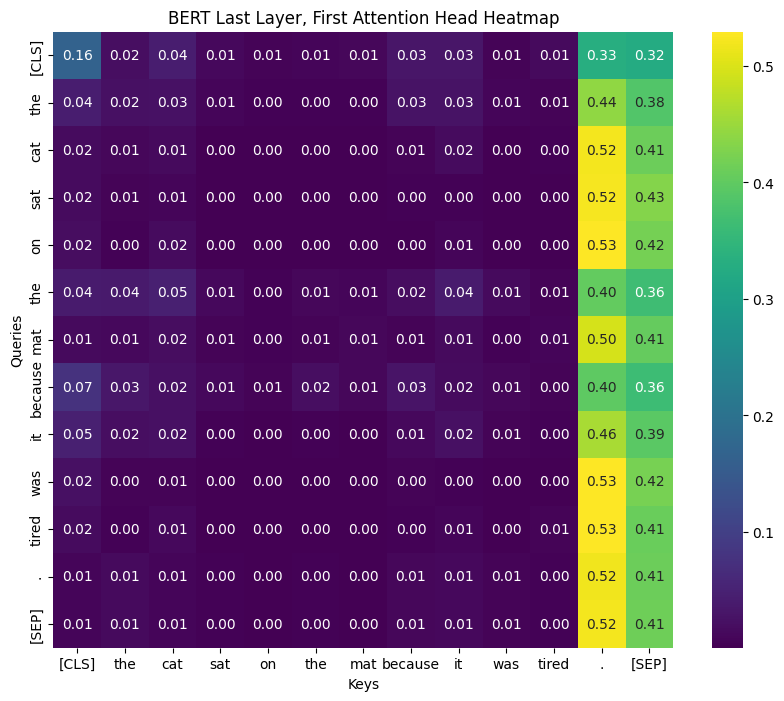

In [16]:
# 6. using "matplotlib and seaborn" to make a heatmap of the attention matrix
plt.figure(figsize=(10, 8))
# Convert TensorFlow tensor to NumPy array for plotting
sns.heatmap(attention_weights.numpy(), xticklabels=tokens, yticklabels=tokens, cmap='viridis', annot=True, fmt=".2f")
plt.title('BERT Last Layer, First Attention Head Heatmap')
plt.xlabel('Keys')
plt.ylabel('Queries')
plt.show()